This notebook will use a Monte Carlo simulation to approximate the value of $\pi$.

# Approximate Pi

A square with side length $s = 2$ has a circle with radius $r = 1$ inscribed as shown below.
![WholeCircle.png](attachment:WholeCircle.png)

To approximate pi, we will plot points in the square, some will be inside the circle, some will be outside the circle. We will find the ratio $M/N$ of the number of points inside the circle, $M$, to the total number of points, $N$. This ratio will be the approximate area of the circle. To simplify the process, we can focus only on the top right cornder of the square and circle. This will give us a smaller square with side length $s_1 = 1$ and a quarter of the original circle with radius $r = 1$, shown below.

![Part of Circle Inscribed in Square](attachment:CircleInSquare.png)


# Monte Carlo

A Monte Carlo simulation uses lots of random points to simulate a scenario. We will generate many random ordered pairs (x,y), each with a coordinate in $[0, 1)$ to stay within our quarter circle. When we compute the ratio $M/N$, we will approximate a quarter of the area of the whole circle. <br><br>

### What does this have to do with $\pi$???
A circle with radius = 1 has and area $A = \pi r^2 = \pi(1)^2 = \pi$. The area of our inscribed circle is $1/4 \pi = \pi/4$. <br>

Thus, to approximate $\pi$, we will have $\pi/4\approx M/N$, solving for $\pi$, we find $\pi\approx4*M/N$.

### How can we tell if points are inside the circle?
The equation for the circle with a radius $r$ and a center at $(x_0,y_0)$ is given by<br>
$(x-x_0)^2+(y-y_0)^2=r^2$<br>
To start, we will use a radius $r = 1$ and a center at the origin $(0,0)$, so our equation will be <br>
$(x-0)^2+(y-0)^2=(1)^2$<br>
$x^2+y^2=1$<br>
Thus to find the points inside the circle, $x^2+y^2\le1$

In [1]:
# import the necessary libraries
import numpy as np # work with numbers
import matplotlib.pyplot as plt # visualize results
import math # math functions
import random # generate random coordinates

In [2]:
# total number of points
N = 10000
# number inside the circle
M = 0 
# initiate lists for points inside circle and inside the whole square
x_cir = []
y_cir = []
x_sq = []
y_sq = []
# get random points to plot
for i in range(N):
    x = random.random()
    y = random.random()
    # see if the point falls in or out of circle
    if (x**2 + y**2 <= 1):
        M +=1 #increase the count inside the circle
        x_cir.append(x)
        y_cir.append(y)
    else:
        x_sq.append(x)
        y_sq.append(y)

# get approximation
print('N=', N, ' M=', M, ' pi=', 4*M/N)

N= 10000  M= 7856  pi= 3.1424


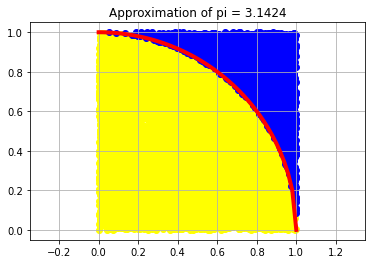

In [3]:
# plot our simulation

approx_pi = 4*M/N
# plot the points and the circle
xlin = np.linspace(0,1)
ylin = [math.sqrt(1-i**2) for i in xlin] #circle

plt.axis('equal') # get square frame
plt.grid(which = 'major')
plt.plot(xlin, ylin, color = 'red', linewidth = '4')

plt.scatter(x_cir, y_cir, color = 'yellow') # in the circle
plt.scatter(x_sq, y_sq, color = 'blue') # out of circle
plt.title('Approximation of pi = %.4f' %approx_pi)
plt.show()

# Cool, it works for this one case, what if $r\neq1$?

Great question! Well, let's see.

N= 15000  M= 11716  pi= 3.1242666666666667
relative error = 0.01733
relative % error = 0.552 %


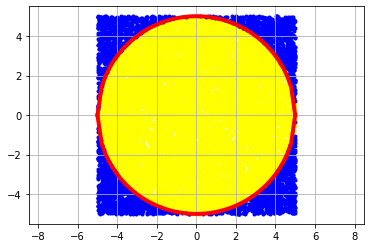

In [6]:
# this works for a circle of any radius r
# define the radius of the circle
r = 5

# total number of points
N = 15000
# number inside the circle
M = 0 
# initiate lists for points inside circle and inside the whole square
x_cir = []
y_cir = []
x_sq = []
y_sq = []

# get random points to plot
for i in range(N):
    x = random.uniform(-r,r) # get x-coordinates from [-r to r]
    y = random.uniform(-r,r) # get y-coordinates from [-r to r]
    # see if the point falls in or out of circle
    if (x**2 + y**2 <= r**2):
        M +=1 #increase the count inside the circle
        # store the coordinates 
        x_cir.append(x)
        y_cir.append(y)
    else:
        x_sq.append(x)
        y_sq.append(y)

approx_pi = 4*M/N
# get approximation
print('N=', N, ' M=', M, ' pi=', approx_pi)
print('relative error =', round(np.abs(math.pi - approx_pi),5))
print('relative % error =', round((np.abs(math.pi - approx_pi))/math.pi*100,3),'%')

# plot the circle
plt.axis('equal') # get square frame
plt.grid(which = 'major') # show grid lines
# get x-values from -1 to 1
xlin = np.linspace(-r,r)
# top of the circle
ylin_top = [math.sqrt(r**2-i**2) for i in xlin]
# bottom of the circle
ylin_bottom = [-1*math.sqrt(r**2-i**2) for i in xlin]
plt.plot(xlin, ylin_top, color = 'red', linewidth = '4')
plt.plot(xlin, ylin_bottom, color = 'red', linewidth = '4')

plt.scatter(x_cir, y_cir, color = 'yellow', marker = '.')
plt.scatter(x_sq, y_sq, color = 'blue', marker = '.')

plt.show()

## Why does this work for any r?
We are approximating the area of each figure with the number of points inside each figure, respectively. Notice that for a circle of radius $r$ inscribed the smallest square, this square will have side length $s=2r$. For example, see the above plot. The entire circle spans all the way across the square, so its diameter $(2r)$ is equal to the side length of the square $s$.<br>
Recall $M\approx \textrm{area of circle}$ and $N \approx \textrm{area of square}$, so $M/N \approx \frac{\textrm{area of circle}}{\textrm{area of square}} = \frac {\pi r^2}{(2r)^2}= \frac{\pi r^2}{4r^2} = \frac {\pi}{4}$<br>
Thus, no matter what radius we choose, this technique will always approximate $\pi/4$.

# Improving the Approximation

We can improve our approximation using the Law of Large Numbers and the Central Limit Theorem. 

### Law of Large Numbers
This law states that if we repeat an experiment lots and lots of times, the observed results will tend toward the expected results as the number of repetitions increases.<br>
For example, suppose you toss a fair coin. The probability (expected results) that the coin lands on heads (H) is 1/2. Thus, if you flip the coin 10 times, you might expect to get 1/2 of them (5) heads. However, if you actually do this (go ahead and try!) you might get 7 heads, a frequency of 7/10 (observed results). This is more than expected.<br>
The Law of Large Numbers says that if you flip the coin 100, 1000, 10,000, or 10,000,000 times, the number of heads -observed results - will tend toward 1/2 the number of tosses - expected results - as the number of flips increases.<br>
For our situation, if we add more and more points to our plot, our approximation should get closer to the actual value of $\pi$.

### Central Limit Theorem
This theorem states that for an unknown distribution (our collection of coordinates) the sample means will approach a normal distribution. In other words, if we take a bunch of samples from our collection and find their average value and repeat this process lots and lots of times, these averages will be approximately normal. Most values will be toward the average of the collection and some will be farther from the average.

## Apply this to our Approximation
We can recreate our approximation many, many times (Law of Large Numbers) and store the value of $4*M/N = \textrm{Approximate area of circle}$. We then take the average of all of these averages (Central Limit Theorem) and our approximation should improve.

In [7]:
# repeat this process many times for central limit theorem
# average of all iterations should approach true value of pi

# for a better approximation
# can increase total number of points randomly generated (M)
# or number of iterations (I) - this will take longer to run

# since the radius doesn't matter, we will use the simple case of r = 1

# total number of points - increase for better accuracy
N = 100000
# initiate lists for pi approximations
pi_list = []
# number of iterations - increase for better accuracy
I = 1000
for j in range(I):
    # number of points inside the circle
    M = 0 # reset M each iteration
    for i in range(N):
        # create a random ordered pair with each coordinate between 0 and 1
        # this will give points that lie inside and outside the circle
        x = random.random() 
        y = random.random() 
        # equation of circle: x^2 + y^2 = 1
        if (x**2 + y**2 <=1): 
            M += 1 # increase the number of points inside the circle
        else: 
            M = M # do nothing to M
    # store all values of our pi approximation 4*M/N
    pi_list.append(4*M/N) 

approx_pi = np.mean(pi_list) 

# show your findings
print('pi is approximately', round(approx_pi,6))
print('pi is actually', round(math.pi,6))
print('relative error =', round(np.abs(math.pi - approx_pi),5))
print('relative % error =', round((np.abs(math.pi - approx_pi))/math.pi*100,4),'%')

pi is approximately 3.141517
pi is actually 3.141593
relative error = 8e-05
relative % error = 0.0024 %
